# Import all libraries
```Importing all essential libraries for this project```

In [121]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import numpy as np
import sympy as smp  

```Lets get started```

In [147]:

#Particle credentials:->

m=1
q=1

t=np.linspace(0.01,np.pi/4,1000)

def acc(state,t):
    x,y,z,vx,vy,vz=state
    

    v=np.array([vx,vy,vz])
    E=np.array([1*x,2*y*t,3*z])
    B=np.array([3,4*x*t,5])

    a=(q/m)*(np.cross(v,B)+E)
    v_mod=np.linalg.norm(v)
    return vx,vy,vz,a[0],a[1],a[2]

state0=(0,0,0,100,4,6)

sol=odeint(acc,state0,t)

## Calculating some physical quantities

In [167]:
#Energy calculation 

for i in range(0,1000):

    v=np.array([sol])
    print(v)
    

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+02
    4.00000000e+00  6.00000000e+00]
  [ 7.76232733e-02  2.95949685e-03  4.65358031e-03  1.00014820e+02
    3.62584440e+00  5.99125378e+00]
  [ 1.55257506e-01  5.62855511e-03  9.30081755e-03  1.00028231e+02
    3.25161502e+00  5.98366810e+00]
  ...
  [-9.03091813e+00  1.58218098e+01  2.14555643e+00 -8.13129131e+01
    5.64564572e+01 -2.54284687e+01]
  [-9.09416139e+00  1.58657375e+01  2.12646669e+00 -8.16429779e+01
    5.67346925e+01 -2.37573589e+01]
  [-9.15764768e+00  1.59098831e+01  2.10868207e+00 -8.19389381e+01
    5.70181311e+01 -2.20656194e+01]]]
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+02
    4.00000000e+00  6.00000000e+00]
  [ 7.76232733e-02  2.95949685e-03  4.65358031e-03  1.00014820e+02
    3.62584440e+00  5.99125378e+00]
  [ 1.55257506e-01  5.62855511e-03  9.30081755e-03  1.00028231e+02
    3.25161502e+00  5.98366810e+00]
  ...
  [-9.03091813e+00  1.58218098e+01  2.14555643e+00 -8.13129

<Axes: >

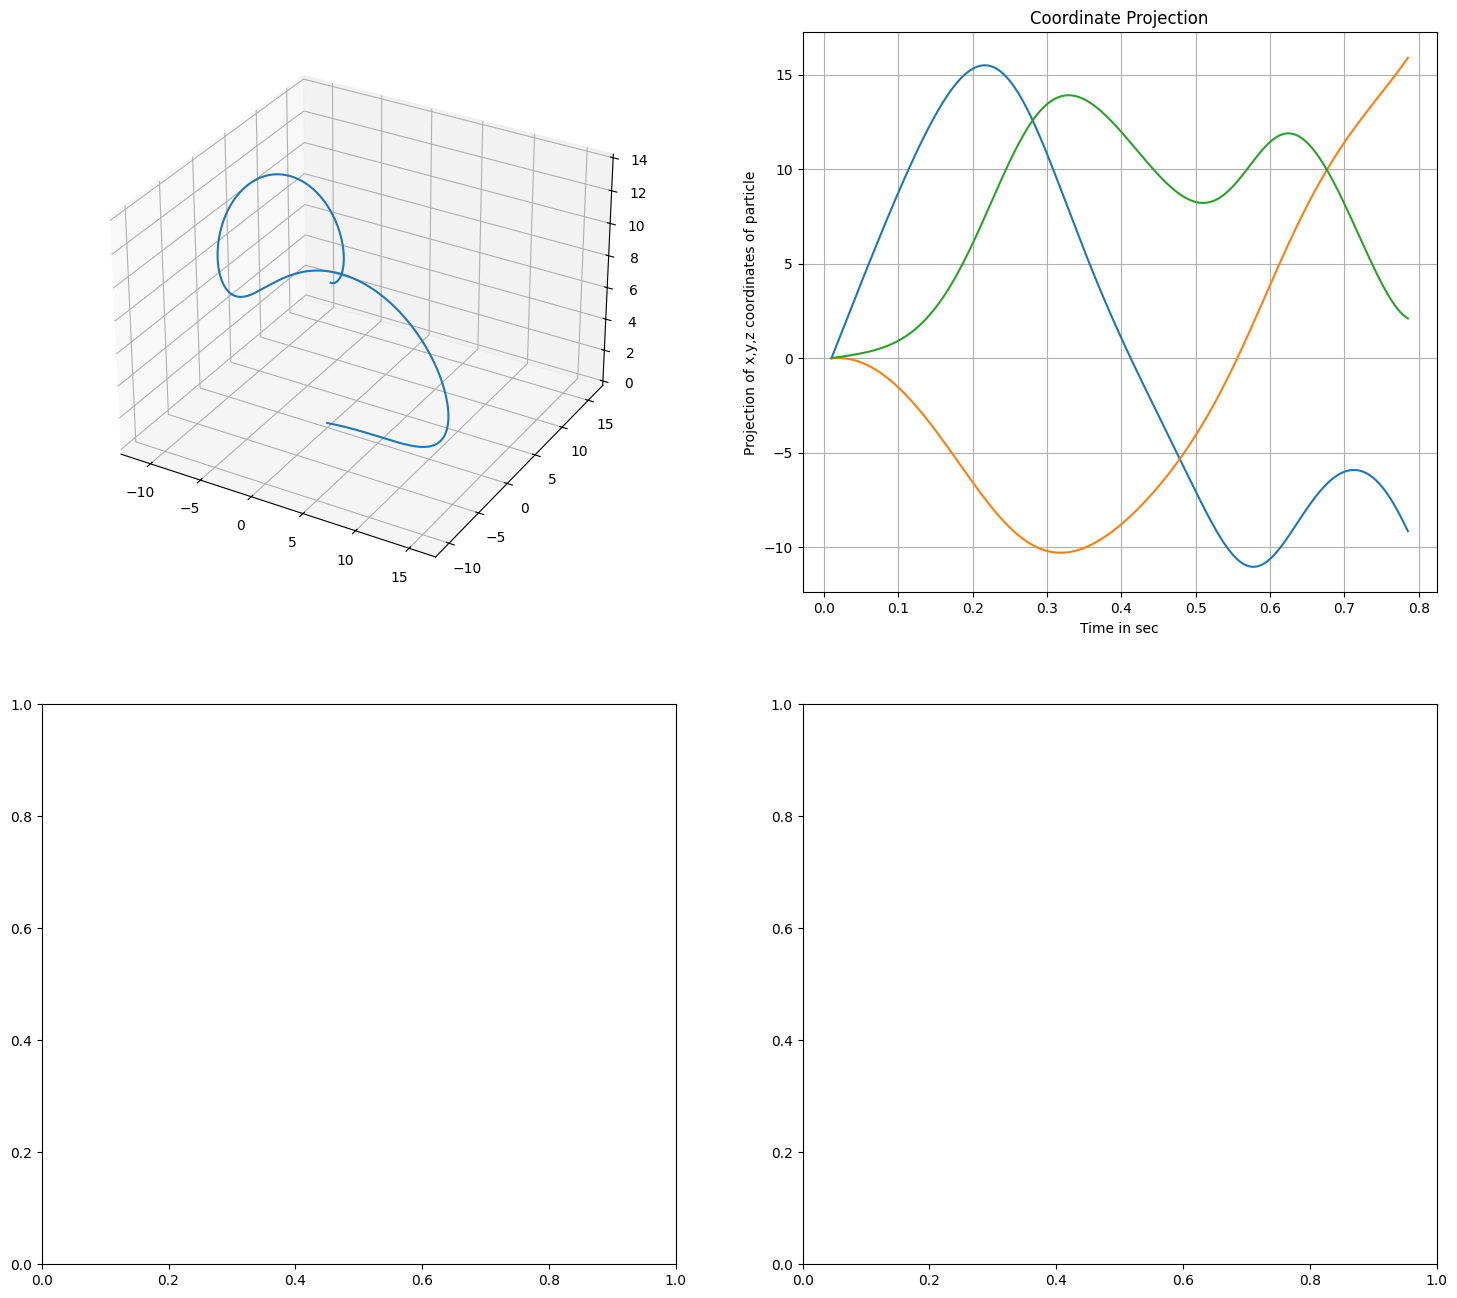

In [139]:
sol.T

fig=plt.figure(figsize=(18,16))


ax = fig.add_subplot(2, 2, 1, projection='3d')


ax.plot(sol.T[0],sol.T[1],sol.T[2])

plt.subplot(2,2,2)
plt.plot(t,sol.T[0])
plt.plot(t,sol.T[1])
plt.plot(t,sol.T[2])
plt.title("Coordinate Projection")
plt.grid("True")
plt.xlabel("Time in sec")
plt.ylabel("Projection of x,y,z coordinates of particle")

plt.subplot(2,2,3)
plt.subplot(2,2,4)
